
 Calculation Q1

Functions: 
 f(x) = exp(-x) - x 
 f(x) = 0 => exp(-x) - x = 0 => x = exp(-x) => g(x) = exp(-x) 
 g(x) = exp(-x) 

The solution is 
 0.5671 
 found in 
 16 iterations. 



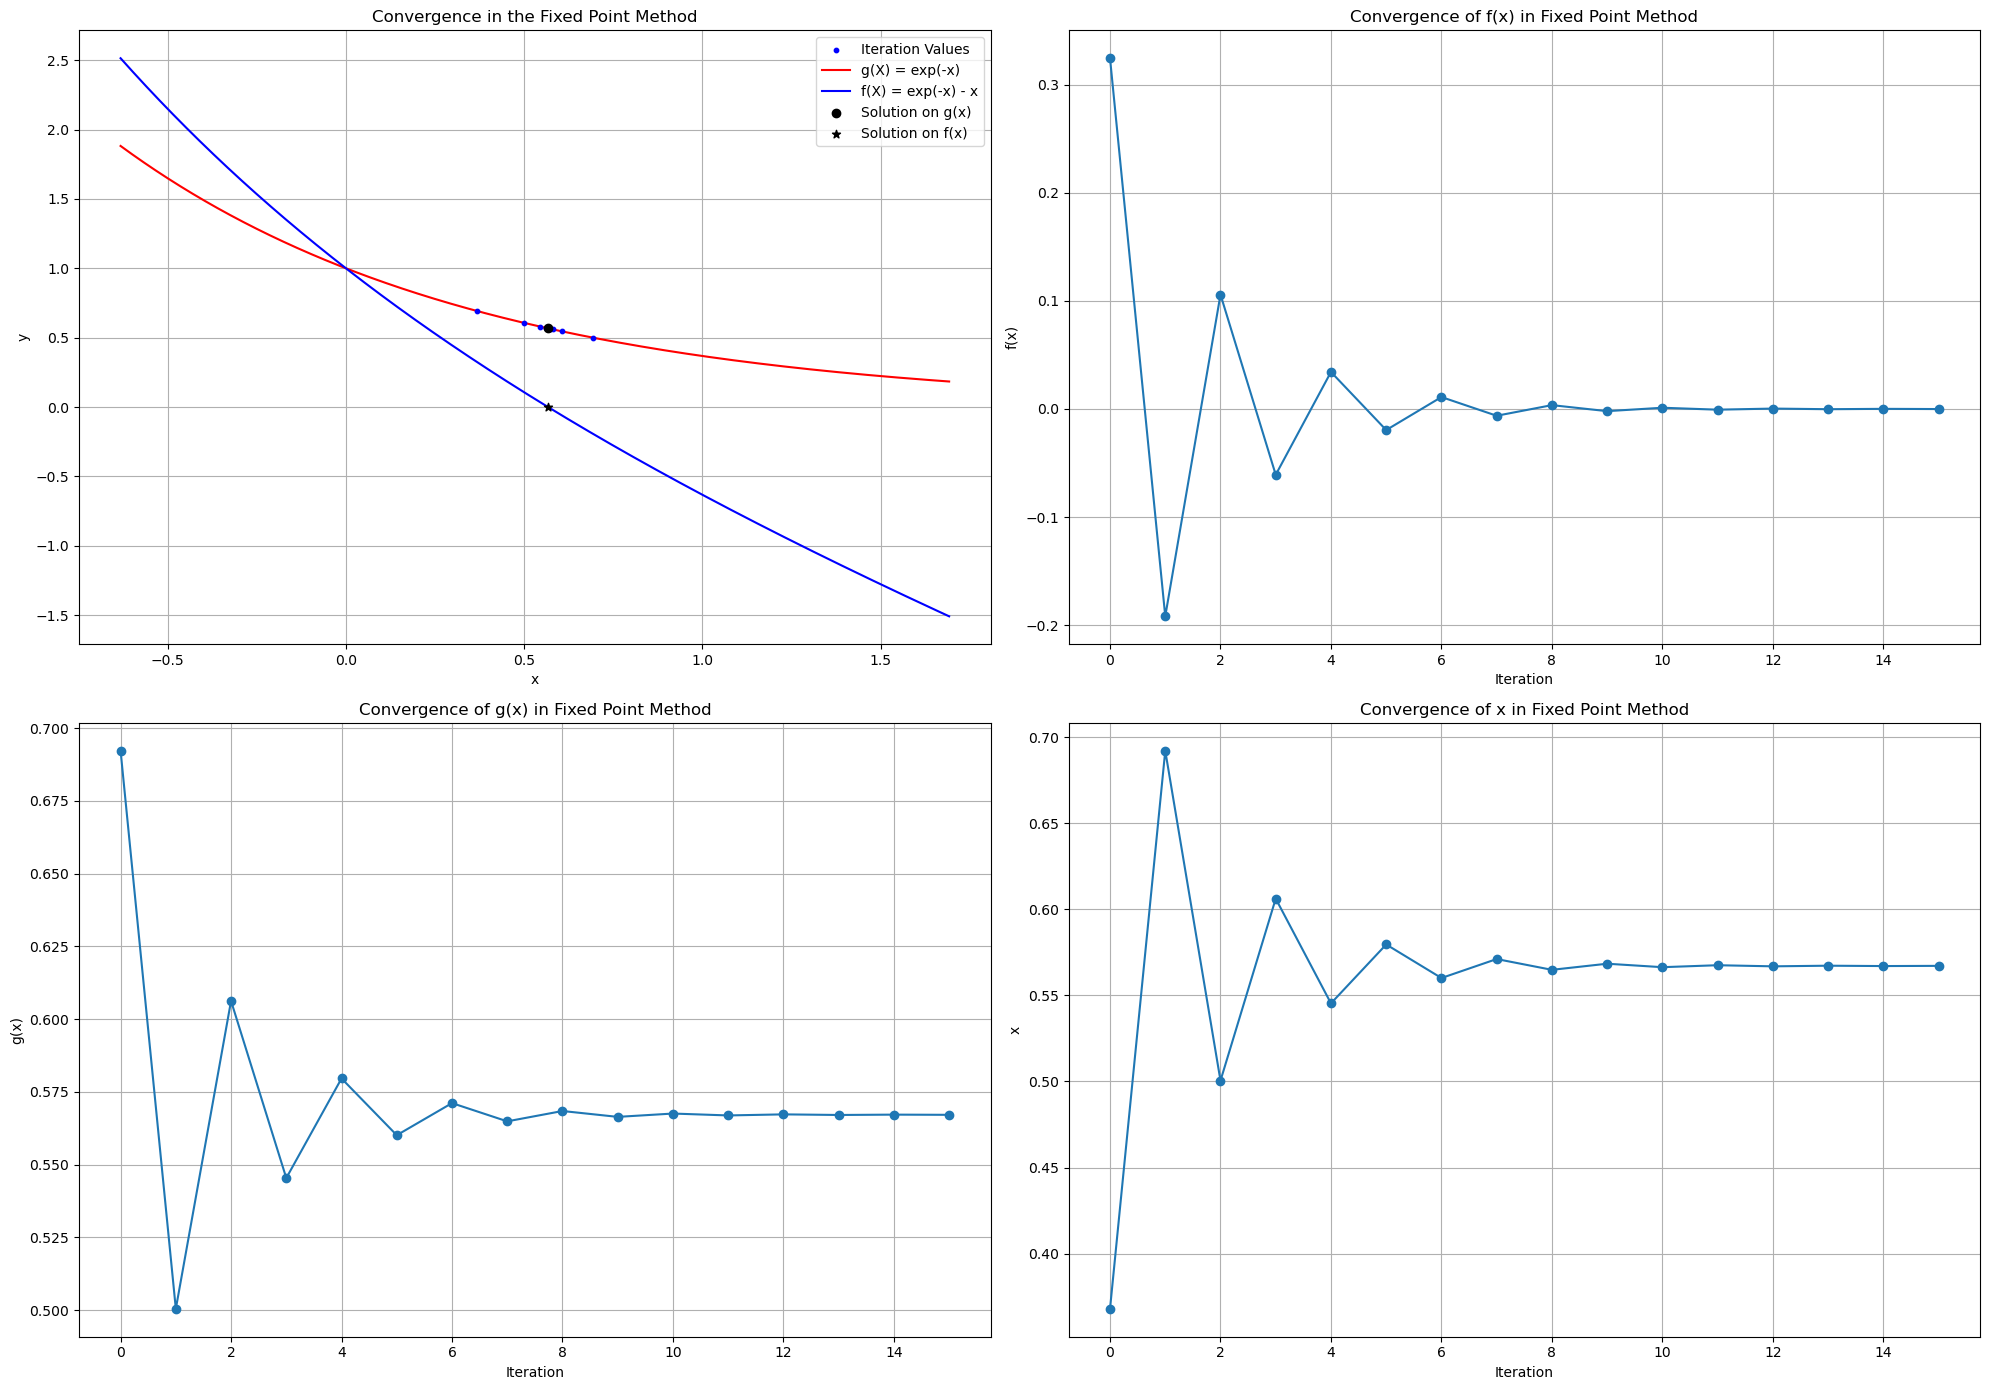

In [1]:
#Q1

import numpy as np
import math
import matplotlib.pyplot as plt
import lib_ar

# fixed point method as defined in the library
'''
def fixed_point_method(func, guess, tolerance=0.0001, max_iterations=1000):
	iterations = [0]
	values = [func(guess)]
	guesses = [guess]
	for i in range(max_iterations):
		next_guess = func(guess)
		if abs(next_guess - guess) < tolerance:
			return next_guess, iterations, values, guesses
		guess = next_guess
		iterations.append(i+1)
		guesses.append(guess)
		values.append(func(guess))
	return None, iterations, values, guesses
#'''

# Defining the function
def func_f(x):
	#f(x) = exp(-x) - x 
	return math.exp(-x) - x
def func_g(x):
	#f(x) = exp(-x) - x 
	#f(x) = 0 => exp(-x) - x = 0 => x = exp(-x) => g(x) = exp(-x)
	return math.exp(-x)

initial_guess = 1
solution, iterations, values, guesses = lib_ar.fixed_point_method(func_g, initial_guess, 1e-4)
print("\n Calculation Q1\n")
print("Functions: \n f(x) = exp(-x) - x \n f(x) = 0 => exp(-x) - x = 0 => x = exp(-x) => g(x) = exp(-x) \n g(x) = exp(-x) \n")
print(f"The solution is \n {solution:.4f} \n found in \n {len(iterations)} iterations. \n")

# Plot the iterations and the value of the function at each iteration
plt.figure(figsize=(20, 14))

# Plotting the convergence of G(X) and the function
plt.subplot(2, 2, 1)
plt.scatter(guesses, values, marker='o', color='b', s=10, zorder = 5, label = 'Iteration Values')

space = np.linspace(min(guesses)-1, max(guesses)+1, 1000)
val = []
for i in range(len(space)):
	val.append(func_g(space[i]))
plt.plot(space, val, color='r', label = 'g(X) = exp(-x)')

val_f = []
for i in range(len(space)):
	val_f.append(func_f(space[i]))
plt.plot(space, val_f, color='b', label = 'f(X) = exp(-x) - x')

plt.scatter(guesses[-1], values[-1], marker='o', color='k', zorder = 10, label = 'Solution on g(x)')
plt.scatter(guesses[-1], func_f(guesses[-1]), marker='*', color='k', zorder = 10, label = 'Solution on f(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Convergence in the Fixed Point Method')
plt.grid(True)
plt.legend()

# Plotting the convergence of f(x)
plt.subplot(2, 2, 2)
val_f = []
for i in range(len(guesses)):
	val_f.append(func_f(guesses[i]))
plt.plot(iterations, val_f, marker='o')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.title('Convergence of f(x) in Fixed Point Method')
plt.grid(True)

# Plotting the convergence of g(x)
plt.subplot(2, 2, 3)
plt.plot(iterations, values, marker='o')
plt.xlabel('Iteration')
plt.ylabel('g(x)')
plt.title('Convergence of g(x) in Fixed Point Method')
plt.grid(True)

# Plotting the convergence of x
plt.subplot(2, 2, 4)
plt.plot(iterations, guesses, marker='o')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('Convergence of x in Fixed Point Method')
plt.grid(True)

plt.tight_layout()
plt.show()

In [2]:
#Q2

import numpy as np
import pandas as pd
import math
import lib_ar


# Simpsons rule as defined in the library
'''
def simpsons_rule(function, lower_limit, upper_limit, num_intervals):
	# Calculate the width of each interval
	interval_width = (upper_limit - lower_limit) / num_intervals

	# Generate the x-values for each interval
	x_values = np.linspace(lower_limit, upper_limit, num_intervals+1)

	# Calculate the y-values for each x-value
	y_values = function(x_values)

	# Apply Simpson's rule formula
	result = interval_width / 3 * (y_values[0] 
									+ 4 * np.sum(y_values[1:-1:2]) 
									+ 2 * np.sum(y_values[2:-1:2]) 
									+ y_values[-1])
	return result
#'''
# Gaussian quadrature method as defined in the library
'''
# Gaussian quadrature
def gaussian_quadrature(f, a, b, n):
	# Compute the sample points and weights
	x, w = np.polynomial.legendre.leggauss(n)
	# Change of variables
	t = 0.5 * (x + 1) * (b - a) + a
	return np.sum(w * f(t)) * 0.5 * (b - a)
#'''

# Testing the accuracy of the methods 
# Comment/Uncomment for accuaracy testing
'''
print("\n TESTING METHOD \n")
# accuracy testing for different step sizes
a = -1
b = 1
def func_test(x):
	return x*np.exp(x)

print(f'Test Function: \n \u222B_{{{a}}}^{{{b}}} f(x) dx = \u222B_{{{a}}}^{{{b}}} x*exp(x) dx \n')

step_sizes_simpson = [10,20,30,40,50,60,70,80,90,100]
step_sizes_quad = [4,5,6]
results_simpson = []
results_quad = []
for i in range(len(step_sizes_simpson)):
	n1 = step_sizes_simpson[i]
	integral_simps = lib_ar.simpsons_rule(func_test, a, b, n1)
	results_simpson.append([n1, "{:.10f}".format(integral_simps)])
for i in range(len(step_sizes_quad)):
	n2 = step_sizes_quad[i]
	integral_quad = lib_ar.gaussian_quadrature(func_test, a, b, n2)
	results_quad.append([n2, "{:.10f}".format(integral_quad)])

df1 = pd.DataFrame(results_simpson, columns=['N', "Simpson's Rule"])
df2 = pd.DataFrame(results_quad, columns=['N', 'Gaussian Quadrature'])

max_rows = max(len(df1), len(df2))
df1 = df1.reindex(range(max_rows))
df2 = df2.reindex(range(max_rows))

df = pd.concat([df1, df2], axis=1)
df = df.fillna('')
print(f"Actual Answer : 2/e = {2/math.e:.10f} \n")
print(df)
#'''

# Defineing the function to integrate
a = 0
b = 1
def func_f(x):
	return np.sqrt(1 + np.power(x,4))

print("\n Calculation Q2 \n")
print(f'Function : \n \u222B_{{{a}}}^{{{b}}} f(x) dx = \u222B_{{{a}}}^{{{b}}} (1 + x^{{4}})^{{0.5}} dx \n')

# calculate the integral using Simpson's rule and Gaussian quadrature
n = 100
integral_simps = lib_ar.simpsons_rule(func_f, a, b, n)
print(f"Simpson's Rule Result: {integral_simps:.6f}")

n = 6
integral_quad = lib_ar.gaussian_quadrature(func_f, a, b, n)
print(f"Gaussian Quadrature Result: {integral_quad:.6f}")


 Calculation Q2 

Function : 
 ∫_{0}^{1} f(x) dx = ∫_{0}^{1} (1 + x^{4})^{0.5} dx 

Simpson's Rule Result: 1.089429
Gaussian Quadrature Result: 1.089429


/tmp/ipykernel_19213/3879156135.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



 Calculation Q3 

Function for dy/dx: 
 y' = (5x^2 - y)/(e^(x+y)) 



Results from the RK4 method for y(0) = 1 at x1 = 5:
   Interval size      y(5)
0           0.50  2.334331
1           0.20  2.334216
2           0.05  2.334214
3           0.01  2.334214


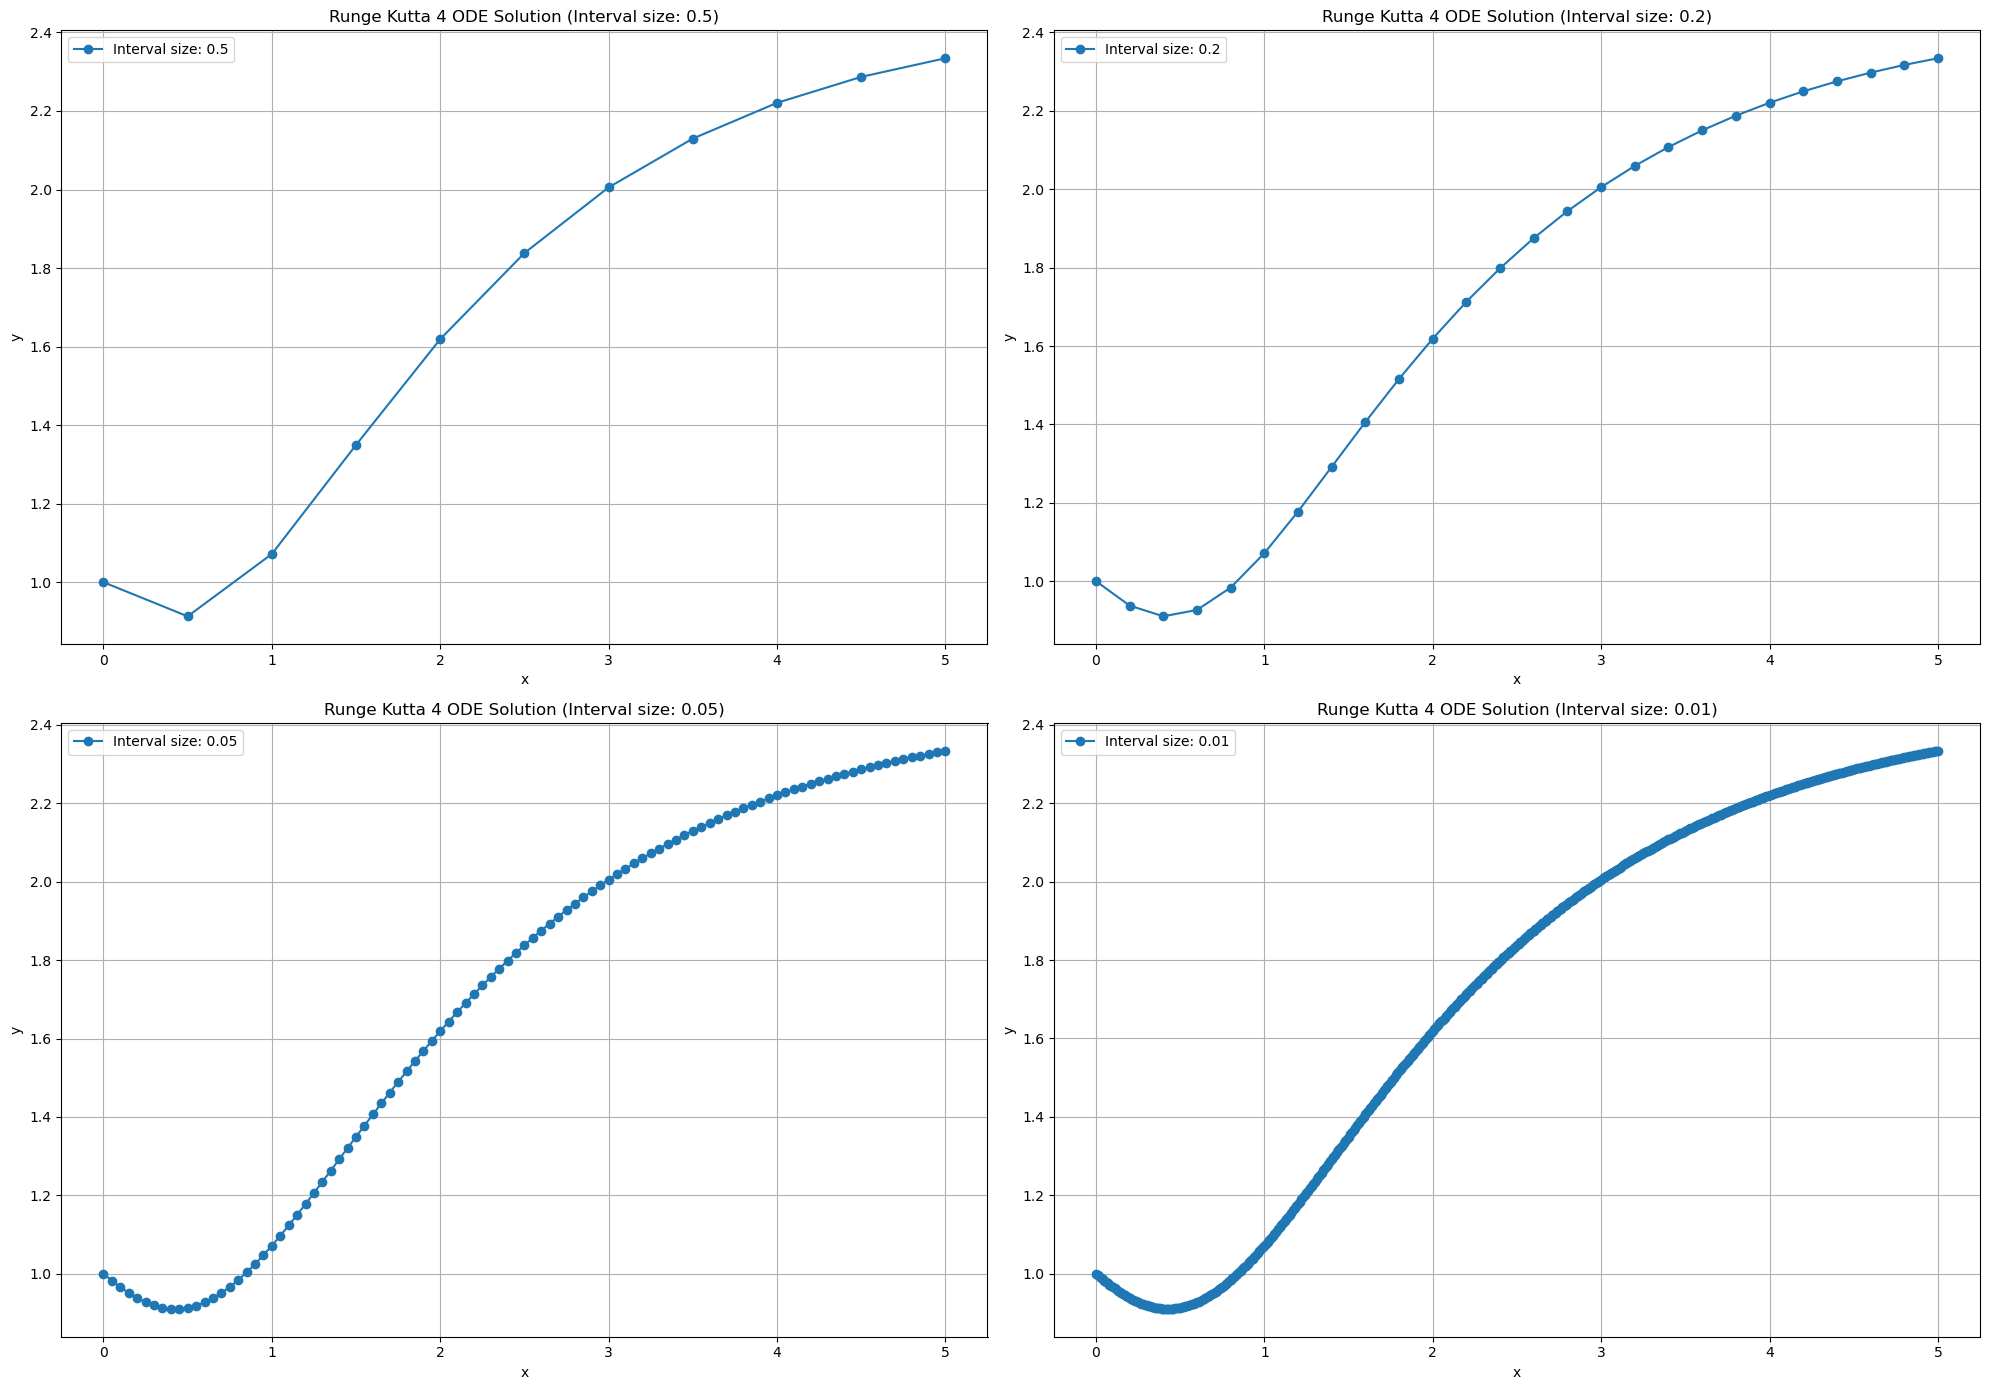

In [3]:
#Q3

import numpy as np
import pandas as pd
import math
import lib_ar
import matplotlib.pyplot as plt

# RK4 Method as coded in the library
'''
#RK4 method for dy/dx
def RK4_dydx(f, x0, y0, x1, h):
	#take dy/dx as f(x,y)
	n = int((x1 - x0) / h)
	x = [x0]
	y = [y0]
	for i in range(n):
		xi = x[i]
		yi = y[i]

		x.append(xi + h)

		k1 = h * f(xi, yi)
		k2 = h * f(xi + 0.5*h, yi + 0.5*k1)
		k3 = h * f(xi + 0.5*h, yi + 0.5*k2)
		k4 = h * f(xi + h, yi + k3)
		
		y.append(yi + ((k1 + 2*k2 + 2*k3 + k4)/6))
		
	return y, x
#'''

# Defining
results = []
x0 = 0
y0 = 1
x1 = 5
interval_sizes = [0.5, 0.2, 0.05, 0.01]

# Define the function for the ODE
def func_dydx(x, y):
	return (5*x**2 - y) / np.exp(x + y)


# Print the Results
print("\n Calculation Q3 \n")
print(f'Function for dy/dx: \n y\' = (5x^2 - y)/(e^(x+y)) \n')

fig, axs = plt.subplots(2, 2, figsize=(20, 14))

i = 0

for h in interval_sizes:
	y, x = lib_ar.RK4_dydx(func_dydx, x0, y0, x1, h)
	results.append({'Interval size': h, f'y({x1})': y[-1]})
	axs[i//2, i%2].plot(x, y, label=f'Interval size: {h}', marker='o')
	# Add labels and legend to the plot
	axs[i//2, i%2].set_xlabel('x')
	axs[i//2, i%2].set_ylabel('y')
	axs[i//2, i%2].set_title(f'Runge Kutta 4 ODE Solution (Interval size: {h})')
	axs[i//2, i%2].legend()
	axs[i//2, i%2].grid(True)
	
	i += 1

plt.tight_layout()

# Convert the list to a DataFrame and print
df = pd.DataFrame(results)
print(f"Results from the RK4 method for y({x0}) = {y0} at x1 = {x1}:")
print(df)

plt.show()



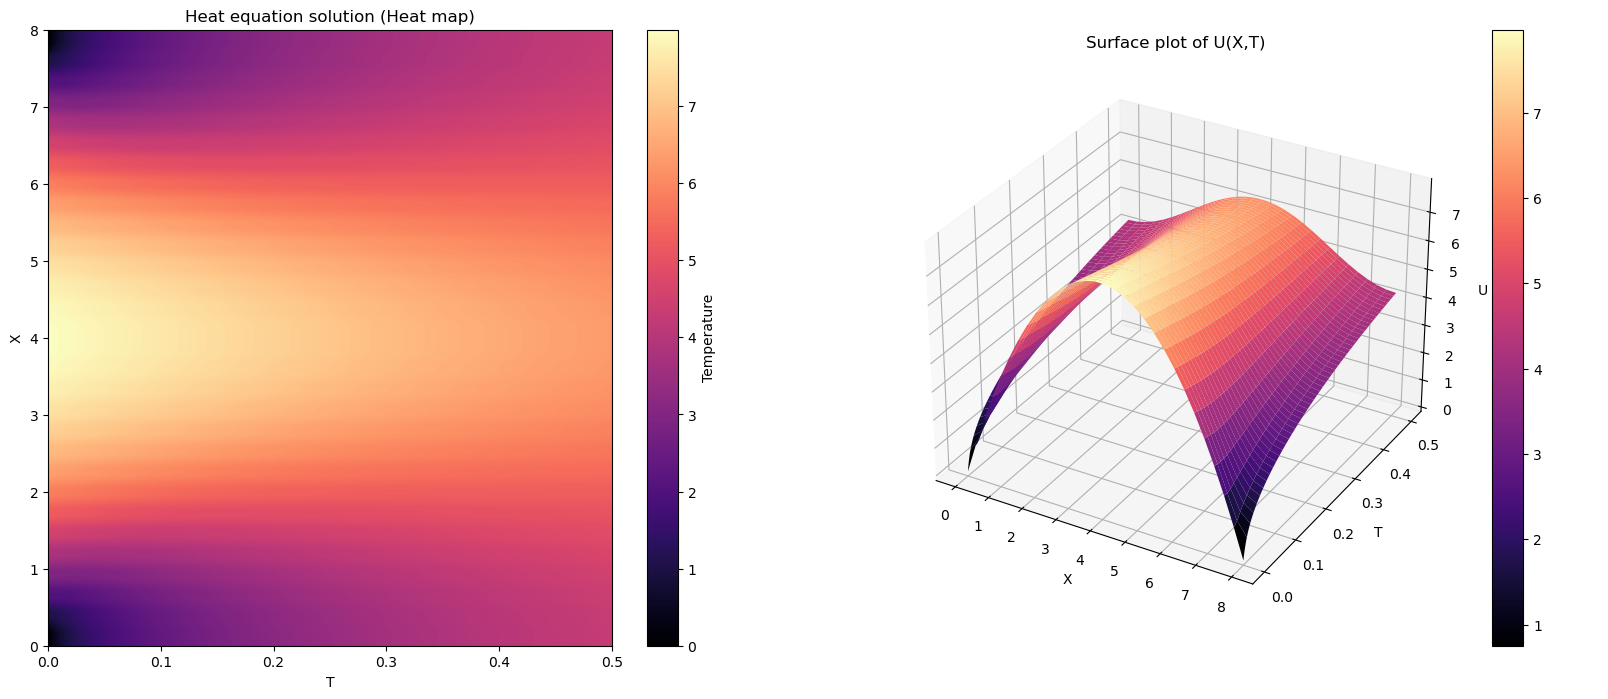

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import lib_ar


# Crank-Nicolson method as defined in the library
'''
#Crank Nicolson method for 1D heat equation
def crank_nicolson_1d(M, N, alpha, u_initial, T, L):
	x0, xL = 0, L
	dx = (xL - x0)/(M-1)
	t0, tF = 0, T 
	dt = (tF - t0)/(N-1)

	a0 = 1 + 2*alpha
	c0 = 1 - 2*alpha

	xspan = np.linspace(x0, xL, M)
	tspan = np.linspace(t0, tF, N)

	# Create the main diagonal for the left-hand side matrix with all elements as a0
	maindiag_a0 = a0*np.ones((1,M))

	# Create the off-diagonal for the left-hand side matrix with all elements as -alpha
	offdiag_a0 = (-alpha)*np.ones((1, M-1))

	# Create the main diagonal for the right-hand side matrix with all elements as c0
	maindiag_c0 = c0*np.ones((1,M))

	# Create the off-diagonal for the right-hand side matrix with all elements as alpha
	offdiag_c0 = alpha*np.ones((1, M-1))

	# Create the left-hand side tri-diagonal matrix
	# Get the length of the main diagonal
	a = maindiag_a0.shape[1]

	# Create a list of the diagonals
	diagonalsA = [maindiag_a0, offdiag_a0, offdiag_a0]

	# Create the tri-diagonal matrix using the sparse library
	# The matrix is then converted to a dense matrix using toarray()
	A = sparse.diags(diagonalsA, [0,-1,1], shape=(a,a)).toarray()

	# Modify specific elements of the matrix to apply certain boundary conditions
	A[0,1] = (-2)*alpha
	A[M-1,M-2] = (-2)*alpha

	# Create the right-hand side tri-diagonal matrix
	# Get the length of the main diagonal
	c = maindiag_c0.shape[1]

	# Create a list of the diagonals
	diagonalsC = [maindiag_c0, offdiag_c0, offdiag_c0]

	# Create the tri-diagonal matrix using the sparse library
	# The matrix is then converted to a dense matrix using toarray()
	Arhs = sparse.diags(diagonalsC, [0,-1,1], shape=(c,c)).toarray()

	# Modify specific elements of the matrix to apply certain boundary conditions
	Arhs[0,1] = 2*alpha
	Arhs[M-1,M-2] = 2*alpha

	#nitializes matrix U
	U = np.zeros((M, N))

	#Initial conditions
	U[:,0] = u_initial(xspan)

	#Boundary conditions
	f = np.arange(1, N+1)
	U[0,:] = 0
	f = U[0,:]
	
	g = np.arange(1, N+1)
	U[-1,:] = 0
	g = U[-1,:]
	
	#k = 1
	for k in range(1, N):
		ins = np.zeros((M-2,1)).ravel()
		b1 = np.asarray([4*alpha*dx*f[k], 4*alpha*dx*g[k]])
		b1 = np.insert(b1, 1, ins)
		b2 = np.matmul(Arhs, np.array(U[0:M, k-1]))
		b = b1 + b2  # Right hand side
		U[0:M, k] = np.linalg.solve(A,b)  # Solving x=A\b
	
	return (U, tspan, xspan)
#'''

# Define the initial condition
def u_init(x):
	return 4*x - x**2 / 2

T = 0.5
L = 8
M = 30 # spacing in L
N = 500 # spacing in T
U, tspan, xspan = lib_ar.crank_nicolson_1d(M=M, N=N, u_initial=u_init, alpha = 0.025, T=T, L=L)


# 2D Heat Map
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

im = axs[0].imshow(U, extent=[0, T, 0, L], origin='lower', aspect='auto', cmap='magma')
fig.colorbar(im, ax=axs[0], label='Temperature')
axs[0].set_xlabel('T')
axs[0].set_ylabel('X')
axs[0].set_title('Heat equation solution (Heat map)')


# 3D Surface Plot
T, X = np.meshgrid(tspan, xspan)

for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].set(xticklabels=[], yticklabels=[])
axs[1].xaxis.set_ticks_position('none')
axs[1].yaxis.set_ticks_position('none')


ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(X, T, U, cmap='magma')

ax2.set_xlabel('X')
ax2.set_ylabel('T')
ax2.set_zlabel('U')
ax2.set_title('Surface plot of U(X,T)')
fig.colorbar(surf, ax=ax2)

plt.show()

U(X,Y): 
 [[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.4         0.0761308  -0.02870569 -0.07878401  0.1566554   1.08731273]
 [ 0.8         0.18342405 -0.03253772 -0.1346564   0.4067215   2.17462546]
 [ 1.2         0.29273414 -0.04119464 -0.20332837  0.65384535  3.26193819]
 [ 1.6         1.13984737  1.22893661  1.67871496  3.82997495  4.34925093]
 [ 2.          2.9836494   4.45108186  6.64023385  9.90606485  5.43656366]]


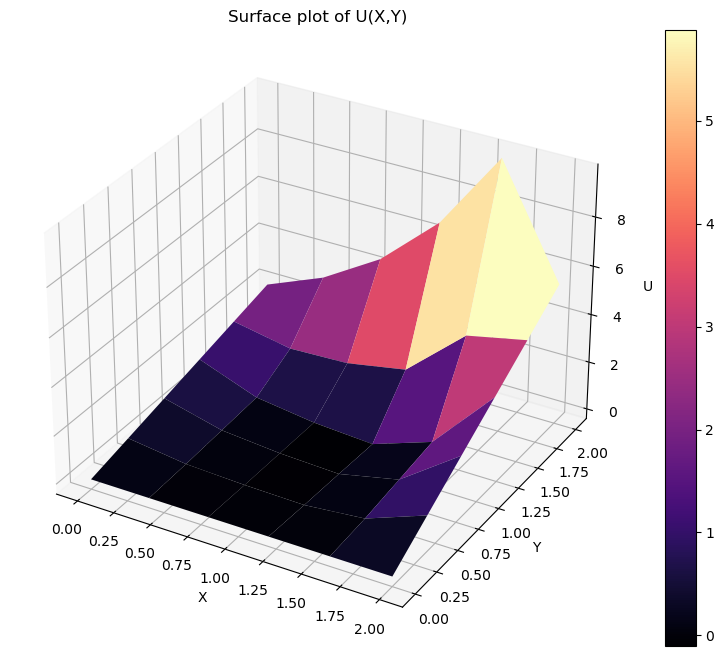

In [6]:
import numpy as np
import matplotlib.pyplot as plt
  
# Define the grid
grid_n = 6
x = np.linspace(0, 2, grid_n)
y = np.linspace(0, 2, grid_n)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Initialize the solution array
U = np.zeros((grid_n, grid_n))

# Set the boundary conditions
U[0, :] = 0  # u(0, y) = 0
U[-1, :] = 2 * np.exp(y)  # u(2, y) = 2e^y
U[:, 0] = x  # u(x, 0) = x
U[:, -1] = x * np.exp(1)  # u(x, 1) = xe

# Define the RHS function
X, Y = np.meshgrid(x, y)
f = X * np.exp(Y)

# Solve the Poisson's equation
for i in range(1, grid_n-1):
	for j in range(1, grid_n-1):
		U[i, j] = ((U[i+1, j] + U[i-1, j]) / dx**2 + (U[i, j+1] + U[i, j-1]) / dy**2 - f[i, j]) / (2/dx**2 + 2/dy**2)


print('U(X,Y): \n',U)

# Create a meshgrid for x and y
X, Y = np.meshgrid(x, y)

# Create the figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, U, cmap='magma')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U')
ax.set_title('Surface plot of U(X,Y)')

# Add a color bar
fig.colorbar(surf)

# Show the plot
plt.show()